Now, a 'subsurface' class sits in utils. This handles all the things that you need to do before defining a stimulus.

In [49]:
%load_ext autoreload
%autoreload 2
from prfpy.utils import subsurface

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import cortex
roi_verts = cortex.get_roi_verts('hcp_999999', 'V1',mask=True)

In [5]:
roi_verts['V1'].shape[0]/2

59292.0

In [6]:
maskL=roi_verts['V1'][:59292]
maskR=roi_verts['V1'][59292:]

In [50]:
myv1surf=subsurface('hcp_999999',[maskL,maskR])

In [51]:
myv1surf.create()

Generating subsurfaces
Creating distance by distance matrices


In [52]:
myv1surf.distance_matrix

array([[0.        , 1.24027392, 2.88532564, ...,        inf,        inf,
               inf],
       [0.71221074, 0.        , 1.60887214, ...,        inf,        inf,
               inf],
       [2.25014134, 1.30320888, 0.        , ...,        inf,        inf,
               inf],
       ...,
       [       inf,        inf,        inf, ..., 0.        , 0.98343155,
        1.88453612],
       [       inf,        inf,        inf, ..., 1.06412855, 0.        ,
        0.75200825],
       [       inf,        inf,        inf, ..., 2.10753158, 1.09422208,
        0.        ]])

Now we create a matrix where distances to the other hemisphere are padded with np.Inf. This way, they are never included in the CF.

In [10]:
import nibabel as nib

datl1=nib.load('/tank/hedger/DATA/HCP_temp/late/tfMRI_MOVIE1_AP_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries_sg_psc_L.gii')
datr1=nib.load('/tank/hedger/DATA/HCP_temp/late/tfMRI_MOVIE1_AP_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries_sg_psc_L.gii')

datl2=nib.load('/tank/hedger/DATA/HCP_temp/late/tfMRI_MOVIE2_PA_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries_sg_psc_L.gii')
datr2=nib.load('/tank/hedger/DATA/HCP_temp/late/tfMRI_MOVIE2_PA_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries_sg_psc_L.gii')

import numpy as np
mydatl=np.array(datl1.agg_data()).T
mydatr=np.array(datr1.agg_data()).T

mydatl2=np.array(datl2.agg_data()).T
mydatr2=np.array(datr2.agg_data()).T
mydat=np.vstack([mydatl,mydatr])


In [11]:
from prfpy.stimulus import CFStimulus

In [53]:
stim=CFStimulus(mydat,myv1surf.subsurface_verts,myv1surf.distance_matrix)

In [54]:
from prfpy.model import CFGaussianModel

In [55]:
model=CFGaussianModel(stim)

In [56]:
sigmas=np.array([0.5,3,5,10])

In [57]:
model.create_grid_predictions(sigmas=sigmas)

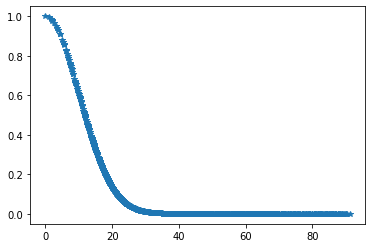

In [66]:
import matplotlib.pyplot as plt

plt.plot(model.stimulus.distance_matrix[-1],model.grid_rfs[-1],'*')

*Sanity check*

Verify that the cf profile has a value of 0 when the distance is infinite

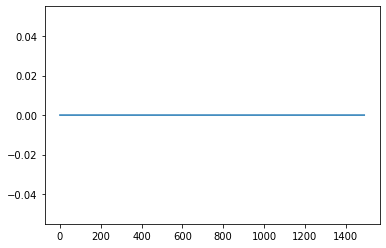

In [74]:
plt.plot(model.grid_rfs[-1][np.where(model.stimulus.distance_matrix[-1]==np.Inf)[0]])

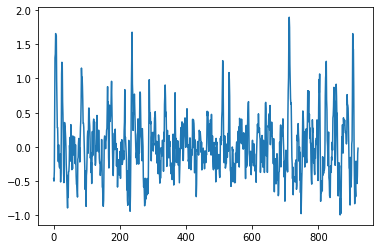

In [76]:
plt.plot(model.predictions[0])

Also generate model predictions.

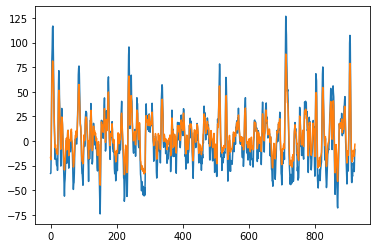

In [88]:
plt.plot(model.return_prediction(3,4,0,model.vert_centres_flat[0])[0])
plt.plot(model.return_prediction(5,1,5,model.vert_centres_flat[0])[0])